In [1]:
# Download these files

# goodreads_books.json.gz: this is the raw database for all the books on goodreads

# goodreads_interactions.csv: this file contains the users and what books they liked with the ratings

# book_id_map.csv: the link between the interaction csv file to the real book id in the goodreads. Not sure why the interaction file doesnt have real book id lol

In [2]:
import gzip
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Build a search engine

In [3]:
with gzip.open("/content/drive/MyDrive/DSFINAL/goodreads_books.json.gz", "r") as f:
  line = f.readline()
  print (line)

b'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "t

In [4]:
import json
json.loads(line)

{'asin': '',
 'authors': [{'author_id': '604031', 'role': ''}],
 'average_rating': '4.00',
 'book_id': '5333265',
 'country_code': 'US',
 'description': '',
 'edition_information': '',
 'format': 'Paperback',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'is_ebook': 'false',
 'isbn': '0312853122',
 'isbn13': '9780312853129',
 'kindle_asin': '',
 'language_code': '',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'num_pages': '256',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'publication_day': '1',
 'publication_month': '9',
 'publication_year': '1984',
 'publisher': "St. Martin's Press",
 'ratings_count': '3',
 'series': [],
 'similar_books': [],
 'text_reviews_count': '1',
 'title': 'W.C. Fields: A Life on Film',
 'title_without_series': 'W.C. Fields: A Life on Film',
 'u

Above print has shown so much infomation that we can use, but we only need few of them

In [5]:
def parse_fields(line):
  data = json.loads (line)
  return {
      "book_id": data["book_id"],
      "title": data["title_without_series"],
      "ratings": data["ratings_count"],
      "url": data["url"],
      "book_cover": data["image_url"],
  }

In [6]:
book_titles = []
with gzip.open("/content/drive/MyDrive/DSFINAL/goodreads_books.json.gz", "r") as f:
  while True:
    line = f.readline()
    if not line:
      break
    fields = parse_fields(line)

    try:
      Ratings = int(fields["ratings"])
    except ValueError:
      continue
    if Ratings > 15:
      book_titles.append(fields)

In [7]:
import pandas as pd
titles = pd.DataFrame.from_dict(book_titles)

In [8]:
titles["ratings"] = pd.to_numeric(titles["ratings"])

In [9]:
pd.set_option('expand_frame_repr', False) # print all data frame in one line
#Preprocessing of the title text
titles["mod_title"] = titles["title"].str.replace("[^a-zA-Z0-9 ]", "", regex = True)
titles["mod_title"] = titles["mod_title"].str.lower()
titles["mod_title"] = titles["mod_title"].str.replace("\s+", " ", regex=True) 
titles

,book_id,title,ratings,url,book_cover,mod_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,the devils notebook
...,...,...,...,...,...,...
1308952,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://www.goodreads.com/book/show/17805813-o...,https://images.gr-assets.com/books/1379766592m...,ondine ondine quartet 05
1308953,331839,Jacqueline Kennedy Onassis: Friend of the Arts,18,https://www.goodreads.com/book/show/331839.Jac...,https://s.gr-assets.com/assets/nophoto/book/11...,jacqueline kennedy onassis friend of the arts
1308954,2685097,The Spaniard's Blackmailed Bride,112,https://www.goodreads.com/book/show/2685097-th...,https://s.gr-assets.com/assets/nophoto/book/11...,the spaniards blackmailed bride
1308955,2342551,The Children's Classic Poetry Collection,36,https://www.goodreads.com/book/show/2342551.Th...,https://s.gr-assets.com/assets/nophoto/book/11...,the childrens classic poetry collection


In [10]:
titles = titles[titles["mod_title"].str.len()>0]
titles.to_json("books_titles.json")

Use TFIDF to refine the search engine so you can find the similar book you liked only in title

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(titles["mod_title"])

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re

#style the search results
def make_clickable(val): 
  return '<a target="_blank" href="{}">Goodreads</a>'.format(val)

#Display the cover page on the list
def show_image(val):
  return '<img src="{}" width=50></img>'.format(val)

#Make search engine a function
def search(query, vectorizer):
  processed = re.sub("[^a-zA-Z0-9 ]", "", query.lower())
  query_vec = vectorizer.transform([processed])
  similarity = cosine_similarity(query_vec, tfidf).flatten()
  indices = np.argpartition(similarity,-10)[-10:] # find the largest 10 similarities in index (not just values)
  results = titles.iloc[indices]
  results = results.sort_values("ratings", ascending=False)
  return results.head(5).style.format({"URL":make_clickable, "cover_image":show_image})
 

In [13]:
search("gone with the wind", vectorizer)

,book_id,title,ratings,url,book_cover,mod_title
1230733,819699,Gone with the Wind,3159,https://www.goodreads.com/book/show/819699.Gone_with_the_Wind,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,gone with the wind
1235589,268325,Gone with the Wind,176,https://www.goodreads.com/book/show/268325.Gone_with_the_Wind,https://images.gr-assets.com/books/1425132412m/268325.jpg,gone with the wind
1269292,7111440,Gone with the Wind,139,https://www.goodreads.com/book/show/7111440-gone-with-the-wind,https://images.gr-assets.com/books/1464787806m/7111440.jpg,gone with the wind
317921,7432839,Gone With the Wind,126,https://www.goodreads.com/book/show/7432839-gone-with-the-wind,https://images.gr-assets.com/books/1270562245m/7432839.jpg,gone with the wind
919877,850259,Gone with the Wind,61,https://www.goodreads.com/book/show/850259.Gone_with_the_Wind,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,gone with the wind


Finding User that have read the same book as us

In [14]:
csv_book_mapping = {}

#read the file line by line
with open("/content/drive/MyDrive/DSFINAL/book_id_map.csv", "r") as f:
    while True:
        line = f.readline()
        if not line:
            break
        csv_id, book_id = line.strip().split(",") #separate the book id from its id in the file. Strip is to hide new line charater
        csv_book_mapping[csv_id] = book_id #store the book id in the predefined dictionary

Take user input and put into the data frame with user ID, book ID, Rating and Title

In [15]:
userfavbook = input('What is your faverite book?\n')


What is your faverite book?
gone with the wind


In [16]:
returned_search = search(userfavbook, vectorizer)
listofresult = returned_search.data
listofresult

,book_id,title,ratings,url,book_cover,mod_title
1230733,819699,Gone with the Wind,3159,https://www.goodreads.com/book/show/819699.Gon...,https://s.gr-assets.com/assets/nophoto/book/11...,gone with the wind
1235589,268325,Gone with the Wind,176,https://www.goodreads.com/book/show/268325.Gon...,https://images.gr-assets.com/books/1425132412m...,gone with the wind
1269292,7111440,Gone with the Wind,139,https://www.goodreads.com/book/show/7111440-go...,https://images.gr-assets.com/books/1464787806m...,gone with the wind
317921,7432839,Gone With the Wind,126,https://www.goodreads.com/book/show/7432839-go...,https://images.gr-assets.com/books/1270562245m...,gone with the wind
919877,850259,Gone with the Wind,61,https://www.goodreads.com/book/show/850259.Gon...,https://s.gr-assets.com/assets/nophoto/book/11...,gone with the wind


In [17]:
userfavbook = ["-1", listofresult.iloc[0]['book_id'], 5, listofresult.iloc[0]['title']] # Assume the user will rate his/her favourite book 5
userfavbook

['-1', '819699', 5, 'Gone with the Wind']

In [18]:
my_books = pd.DataFrame([userfavbook], columns=["user_id", "book_id", "rating", "title"])
my_books["book_id"] = my_books["book_id"].astype(str) # make sure the book id is in a string so it will match the other file

In [19]:
book_set = set(my_books["book_id"]) #Create a set to store the book user liked

In [20]:
#find the users who read the same books as us

overlap_users = {}

#open the interaction file and read line by line
with open("/content/drive/MyDrive/DSFINAL/goodreads_interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        book_id = csv_book_mapping.get(csv_id) # find the book id according the csv id in the mapping file
        
        # add the user to the user dictionary if the user read the book we liked
        if book_id in book_set:
            if user_id not in overlap_users:
                overlap_users[user_id] = 1
            else: 
                overlap_users[user_id] += 1   # also count how many times the user have read the book that we liked

In [21]:
len(overlap_users)

776

In [22]:
#Create a list of the books the above users read which we might like those books as well!

interactions_list = []

with open("/content/drive/MyDrive/DSFINAL/goodreads_interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        if user_id in overlap_users:
            book_id = csv_book_mapping[csv_id]
            interactions_list.append([user_id, book_id, rating])

In [23]:
len(interactions_list)

967660

EDA

In [24]:
# change ethe interaction list from list into a dataframe
interactions = pd.DataFrame(interactions_list, columns=["user_id", "book_id", "rating"])

In [25]:
#change the date type in the dataframe
interactions["book_id"] = interactions["book_id"].astype(str)
interactions["user_id"] = interactions["user_id"].astype(str)
interactions["rating"] = pd.to_numeric(interactions["rating"])

In [26]:
# how many books appered in each recommendations and find the mean ratings
book_recs = interactions.groupby("book_id").rating.agg(['count', 'mean'])

In [27]:
book_recs

,count,mean
book_id,,
1,362,3.809392
10,5,5.000000
100,2,2.500000
10000,2,0.000000
10000006,2,4.000000
...,...,...
9999888,1,0.000000
9999894,2,2.000000
9999925,4,2.250000


In [28]:
# #Find the book title based on the book id
# books_titles = pd.read_json("/content/drive/MyDrive/DSFINAL/books_titles.json")
# books_titles["book_id"] = books_titles["book_id"].astype(str) # make sure the book title is stored as a string

In [29]:
books_titles = pd.read_json("books_titles.json")
books_titles["book_id"] = books_titles["book_id"].astype(str) # make sure the book title is stored as a string

In [65]:
#merge the 2 data sets to get the book titles into the recommendations
book_recss = book_recs.merge(books_titles, how="inner", on="book_id")

In [66]:
book_recss

,book_id,count,mean,title,ratings,url,book_cover,mod_title
0,1,362,3.809392,Harry Potter and the Half-Blood Prince (Harry ...,1713866,https://www.goodreads.com/book/show/1.Harry_Po...,https://images.gr-assets.com/books/1361039191m...,harry potter and the halfblood prince harry po...
1,10,5,5.000000,"Harry Potter Collection (Harry Potter, #1-6)",25245,https://www.goodreads.com/book/show/10.Harry_P...,https://images.gr-assets.com/books/1328867351m...,harry potter collection harry potter 16
2,100,2,2.500000,Simply Beautiful Beading,75,https://www.goodreads.com/book/show/100.Simply...,https://s.gr-assets.com/assets/nophoto/book/11...,simply beautiful beading
3,10000,2,0.000000,The Face of Another,2079,https://www.goodreads.com/book/show/10000.The_...,https://images.gr-assets.com/books/1320415026m...,the face of another
4,10000006,2,4.000000,Hatch!,89,https://www.goodreads.com/book/show/10000006-h...,https://images.gr-assets.com/books/1355030251m...,hatch
...,...,...,...,...,...,...,...,...
301588,9999888,1,0.000000,My Wild Sister and Me,56,https://www.goodreads.com/book/show/9999888-my...,https://images.gr-assets.com/books/1344668621m...,my wild sister and me
301589,9999894,2,2.000000,"Questions, Questions",151,https://www.goodreads.com/book/show/9999894-qu...,https://images.gr-assets.com/books/1344678736m...,questions questions
301590,9999925,4,2.250000,Spring Is Here,479,https://www.goodreads.com/book/show/9999925-sp...,https://s.gr-assets.com/assets/nophoto/book/11...,spring is here
301591,9999934,2,1.000000,Ten Moonstruck Piglets,61,https://www.goodreads.com/book/show/9999934-te...,https://s.gr-assets.com/assets/nophoto/book/11...,ten moonstruck piglets


In [67]:
book_recss = book_recss.sort_values(by=['count'],ascending=False)
book_recss["count"] = book_recss["count"].astype(int) # make sure the ratings are integers 
plotone = book_recss.head(20)
plotone

,book_id,count,mean,title,ratings,url,book_cover,mod_title
276551,819699,776,2.729381,Gone with the Wind,3159,https://www.goodreads.com/book/show/819699.Gon...,https://s.gr-assets.com/assets/nophoto/book/11...,gone with the wind
171443,2767052,458,3.834061,"The Hunger Games (The Hunger Games, #1)",4899965,https://www.goodreads.com/book/show/2767052-th...,https://images.gr-assets.com/books/1447303603m...,the hunger games the hunger games 1
183870,3,432,3.951389,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,https://www.goodreads.com/book/show/3.Harry_Po...,https://images.gr-assets.com/books/1474154022m...,harry potter and the sorcerers stone harry pot...
166594,2657,421,3.382423,To Kill a Mockingbird,3255518,https://www.goodreads.com/book/show/2657.To_Ki...,https://images.gr-assets.com/books/1361975680m...,to kill a mockingbird
64201,15881,411,3.673966,Harry Potter and the Chamber of Secrets (Harry...,1821802,https://www.goodreads.com/book/show/15881.Harr...,https://images.gr-assets.com/books/1474169725m...,harry potter and the chamber of secrets harry ...
47175,136251,400,3.960000,Harry Potter and the Deathly Hallows (Harry Po...,1784684,https://www.goodreads.com/book/show/136251.Har...,https://images.gr-assets.com/books/1474171184m...,harry potter and the deathly hallows harry pot...
239010,6148028,398,3.693467,"Catching Fire (The Hunger Games, #2)",1854746,https://www.goodreads.com/book/show/6148028-ca...,https://images.gr-assets.com/books/1358273780m...,catching fire the hunger games 2
220043,4671,397,2.974811,The Great Gatsby,2758812,https://www.goodreads.com/book/show/4671.The_G...,https://images.gr-assets.com/books/1490528560m...,the great gatsby
214257,41865,386,3.090674,"Twilight (Twilight, #1)",3941381,https://www.goodreads.com/book/show/41865.Twil...,https://images.gr-assets.com/books/1361039443m...,twilight twilight 1
261334,7260188,384,3.328125,"Mockingjay (The Hunger Games, #3)",1743362,https://www.goodreads.com/book/show/7260188-mo...,https://images.gr-assets.com/books/1358275419m...,mockingjay the hunger games 3


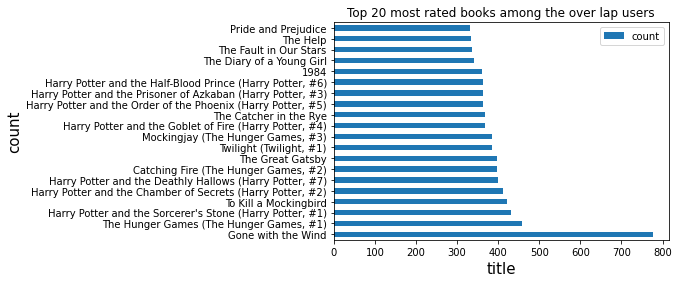

In [68]:

import matplotlib.pyplot as plt

plotone.plot(x ='title', y='count', kind = 'barh')
plt.title("Top 20 most rated books among the over lap users")
plt.xlabel("title", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.show()


,book_id,count,mean,title,ratings,url,book_cover,mod_title
276551,819699,776,2.729381,Gone with the Wind,3159,https://www.goodreads.com/book/show/819699.Gon...,https://s.gr-assets.com/assets/nophoto/book/11...,gone with the wind
171443,2767052,458,3.834061,"The Hunger Games (The Hunger Games, #1)",4899965,https://www.goodreads.com/book/show/2767052-th...,https://images.gr-assets.com/books/1447303603m...,the hunger games the hunger games 1
183870,3,432,3.951389,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,https://www.goodreads.com/book/show/3.Harry_Po...,https://images.gr-assets.com/books/1474154022m...,harry potter and the sorcerers stone harry pot...
64201,15881,411,3.673966,Harry Potter and the Chamber of Secrets (Harry...,1821802,https://www.goodreads.com/book/show/15881.Harr...,https://images.gr-assets.com/books/1474169725m...,harry potter and the chamber of secrets harry ...
47175,136251,400,3.960000,Harry Potter and the Deathly Hallows (Harry Po...,1784684,https://www.goodreads.com/book/show/136251.Har...,https://images.gr-assets.com/books/1474171184m...,harry potter and the deathly hallows harry pot...
239010,6148028,398,3.693467,"Catching Fire (The Hunger Games, #2)",1854746,https://www.goodreads.com/book/show/6148028-ca...,https://images.gr-assets.com/books/1358273780m...,catching fire the hunger games 2
235841,6,369,3.899729,Harry Potter and the Goblet of Fire (Harry Pot...,1792561,https://www.goodreads.com/book/show/6.Harry_Po...,https://images.gr-assets.com/books/1361482611m...,harry potter and the goblet of fire harry pott...
225147,5107,367,2.555858,The Catcher in the Rye,2086945,https://www.goodreads.com/book/show/5107.The_C...,https://images.gr-assets.com/books/1398034300m...,the catcher in the rye
112382,2,363,3.818182,Harry Potter and the Order of the Phoenix (Har...,1766895,https://www.goodreads.com/book/show/2.Harry_Po...,https://images.gr-assets.com/books/1507396732m...,harry potter and the order of the phoenix harr...
105491,1885,332,3.376506,Pride and Prejudice,2078406,https://www.goodreads.com/book/show/1885.Pride...,https://images.gr-assets.com/books/1320399351m...,pride and prejudice


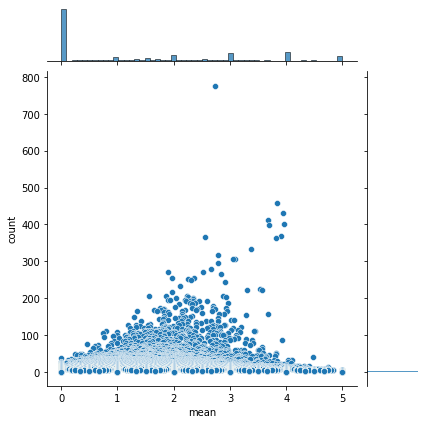

In [72]:

drop_zeroa = book_recss.index[book_recss["mean"] <= 0.2].tolist()
drop_zerob = book_recss.index[book_recss["count"] <= 0.2].tolist()
c=drop_zeroa + drop_zerob
plot_two=book_recss.drop(book_recss.index[c])

import seaborn as sns
sns.jointplot(x='mean', y='count', data=plot_two)

plot_two.sort_values('count', ascending=False).head(20)